# Project 2: Educational system's data analysis

**Objective**
Determine which countries are most promising for online courses and who to target first.
***
**Data Analysis**
-Data set analysis (missing values, duplicates?)<br>
-Types of informations (number of colomns,lines) <br>
-Select relevants indicators to answer the problematic<br>
-Determine statisticals indicators for each geographic areas & countries
***
**Dataset:**  
https://datacatalog.worldbank.org/dataset/education-statistics

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-2:-Educational-system's-data-analysis" data-toc-modified-id="Project-2:-Educational-system's-data-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project 2: Educational system's data analysis</a></span></li><li><span><a href="#Data-discovery-" data-toc-modified-id="Data-discovery--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data discovery <a name="introduction"></a></a></span><ul class="toc-item"><li><span><a href="#Missing-Data" data-toc-modified-id="Missing-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Missing Data</a></span></li><li><span><a href="#Database-filter" data-toc-modified-id="Database-filter-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Database filter</a></span></li></ul></li><li><span><a href="#Indicator-study" data-toc-modified-id="Indicator-study-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Indicator study</a></span><ul class="toc-item"><li><span><a href="#Country-study" data-toc-modified-id="Country-study-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Country study</a></span></li><li><span><a href="#Outliers-study" data-toc-modified-id="Outliers-study-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outliers study</a></span></li></ul></li><li><span><a href="#Most-promising-countries" data-toc-modified-id="Most-promising-countries-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Most promising countries</a></span><ul class="toc-item"><li><span><a href="#Study-of-each-country-by-indicator" data-toc-modified-id="Study-of-each-country-by-indicator-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Study of each country by indicator</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Future-Improvements" data-toc-modified-id="Future-Improvements-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Future Improvements</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data discovery <a name="introduction"></a>

In [2]:
data = pd.read_csv("EdStatsData.csv")

data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# print(data.describe())
print(data.info())
# 886930 row, 70 columns
# 3665 indicator & 242 countries
#check if specific index

print(data.index.values)

# #Duplicate
duplicateRowsDF = data[data.duplicated(['Country Name','Indicator Name'])]
duplicateRowsDF
# #No duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
Country Name      886930 non-null object
Country Code      886930 non-null object
Indicator Name    886930 non-null object
Indicator Code    886930 non-null object
1970              72288 non-null float64
1971              35537 non-null float64
1972              35619 non-null float64
1973              35545 non-null float64
1974              35730 non-null float64
1975              87306 non-null float64
1976              37483 non-null float64
1977              37574 non-null float64
1978              37576 non-null float64
1979              36809 non-null float64
1980              89122 non-null float64
1981              38777 non-null float64
1982              37511 non-null float64
1983              38460 non-null float64
1984              38606 non-null float64
1985              90296 non-null float64
1986              39372 non-null float64
1987              38641 non-

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69


## Missing Data

Mean of missing data 91.32
308 indicateurs avec projection à partir de 2020


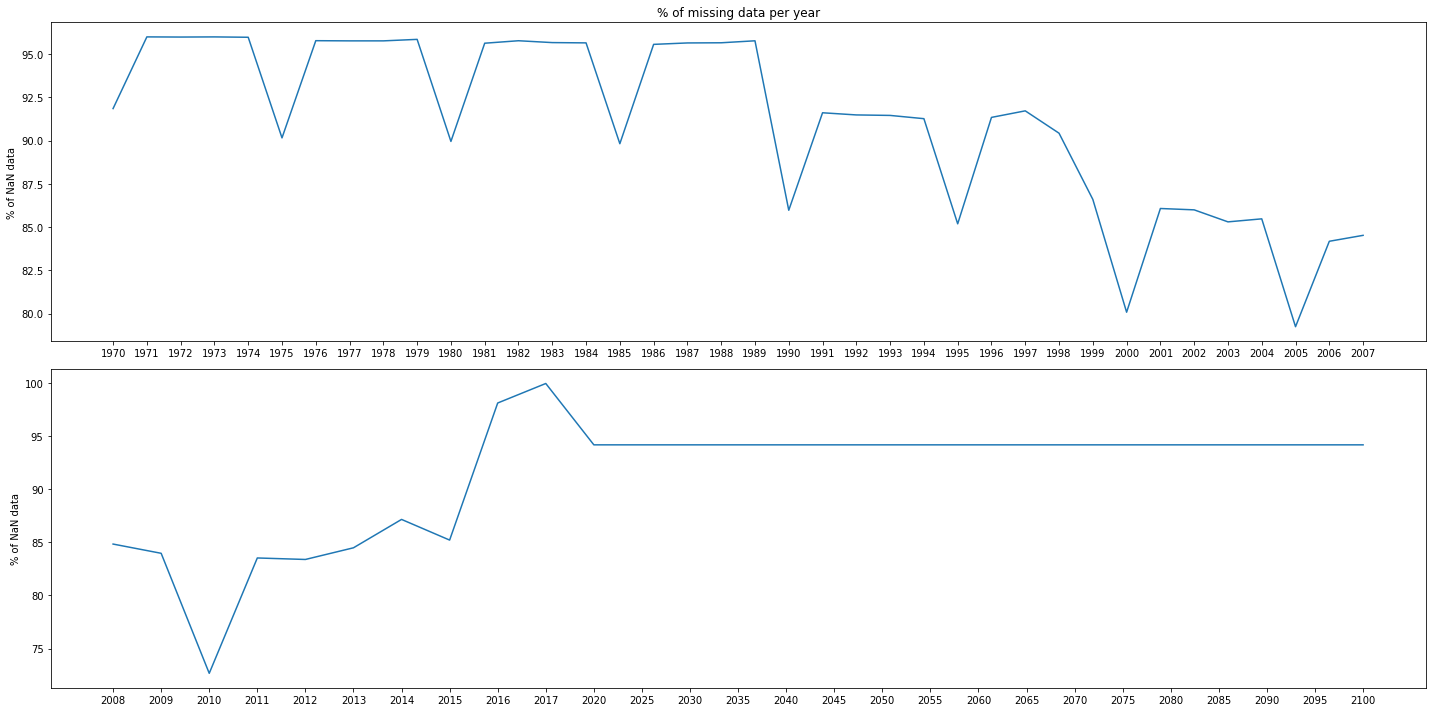

In [4]:
ROW_NUMBER = len(data.index)

#Global % of missing data 
b = data.iloc[:,4:].isna().sum()*100/(ROW_NUMBER)
mean_missing_data = b.mean()
print(f"Mean of missing data {mean_missing_data:.2f}")

#Projection from 2020
df = data[['Country Name','Indicator Name','2020']].dropna()
print(f"{df['Indicator Name'].nunique()} indicateurs avec projection à partir de 2020")

plt.figure(figsize=(20,10))
#a tester
plt.subplot(2,1,1)
plt.plot(b[:38])
plt.ylabel("% of NaN data")
plt.title("% of missing data per year")

plt.subplot(2,1,2)
plt.plot(b[38:-1])
plt.ylabel("% of NaN data")
# plt.show()
# plt.draw() à checker
plt.tight_layout()

4 facts important facts to notice:
1. Lots of missing values with a 91% mean
2. Lots of periodic indicators, every 5 years
3. From 2020 to 2100: only predicted values of 308 indicators by Wittgenstein Projection (mainly demographic evolution)
4. No duplicated data

For this study, we will focus especially on the 2010-2015 years, which have the most values available and are not obselete.

## Database filter

In [5]:
#Filter unsuable years
YEAR_UNSTUDIED1 = [str(i) for i in range(1970,2010)]
YEAR_UNSTUDIED1.append("2016")
YEAR_UNSTUDIED1.append("2017")
YEAR_UNSTUDIED2 = [str(i) for i in range(2020,2105,5)]

filter_column = YEAR_UNSTUDIED1 + YEAR_UNSTUDIED2
filter_column.append("Unnamed: 69")
#print(filter_column)


# df = data.drop(columns=filter_column).copy()
data.drop(columns=filter_column,inplace=True)
data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN


# Indicator study
The objective will be to determine whether an indicator has enough data, ie at least 60% countries 

In [6]:
COUNTRY_LEN = data["Country Code"].nunique()
COUNTRY_LIST = data["Country Name"].unique()
ID_LEN = data["Indicator Code"].nunique()
ID_TRESH = 60

#Clean the indicator without at least ID_TRESH % of data
def clean_indicator_value(id_type,df):
    """This function will return the number of indicators that have at least 60% data available"""
    #0 for Indicator Code, 1 for Indicator Name    
    if id_type == 0:
        id_information_rate = df.groupby(["Indicator Name"]).count()*100/COUNTRY_LEN
    else:
        id_information_rate = df.groupby(["Indicator Code"]).count()*100/COUNTRY_LEN
        
    id_information_rate = id_information_rate[[i for i in id_information_rate.iloc[:,3: ].mean(axis=1)>=ID_TRESH]]
    return id_information_rate

#Get the repartition of indicators' available data
def plot_hist(id_info,title):
    #% of data available 
    info = id_info.iloc[:,3:].mean(axis=1)
    plt.hist(info, 15, facecolor='g')
    plt.xlabel('% of data available')
    plt.ylabel('Number of indicator')
    plt.title(title)
    plt.grid(True)

There are 330 indicators with sufficient data


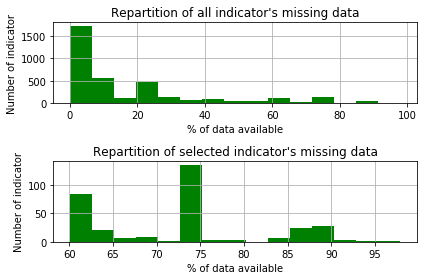

In [7]:
all_id_information_rate = data.groupby(["Indicator Name"]).count()*100/COUNTRY_LEN
id_value = clean_indicator_value(0,data)

plt.subplot(2,1,1)
plot_hist(all_id_information_rate,'Repartition of all indicator\'s missing data')

plt.subplot(2,1,2)
plot_hist(id_value,'Repartition of selected indicator\'s missing data')

plt.tight_layout()

print(f"There are {len(id_value.index)} indicators with sufficient data")

## Country study

From the 330 validated indicators, I choose the ones that will allow to study the country's fit to the problematic 

In [8]:
#Pick up the interesting indicators to answer the problematic
id_value.index[:30]

Index(['Adjusted net enrolment rate, primary, both sexes (%)',
       'Duration of compulsory education (years)',
       'Enrolment in Grade 1 of primary education, both sexes (number)',
       'Enrolment in Grade 1 of primary education, female (number)',
       'Enrolment in Grade 2 of primary education, both sexes (number)',
       'Enrolment in Grade 2 of primary education, female (number)',
       'Enrolment in Grade 3 of primary education, both sexes (number)',
       'Enrolment in Grade 3 of primary education, female (number)',
       'Enrolment in lower secondary education, both sexes (number)',
       'Enrolment in lower secondary education, female (number)',
       'Enrolment in lower secondary general, both sexes (number)',
       'Enrolment in lower secondary general, female (number)',
       'Enrolment in pre-primary education, both sexes (number)',
       'Enrolment in pre-primary education, female (number)',
       'Enrolment in primary education, both sexes (number)',
  

## Outliers study

91.0% data available for GDP per capita, PPP (current international $)
79.5% data available for Enrolment in secondary education, both sexes (number)
76.5% data available for Enrolment in tertiary education, all programmes, both sexes (number)
78.1% data available for Gross enrolment ratio, secondary, both sexes (%)
75.0% data available for Gross enrolment ratio, tertiary, both sexes (%)
94.4% data available for Internet users (per 100 people)
97.1% data available for Population growth (annual %)
69.4% data available for School life expectancy, primary to tertiary, both sexes (years)


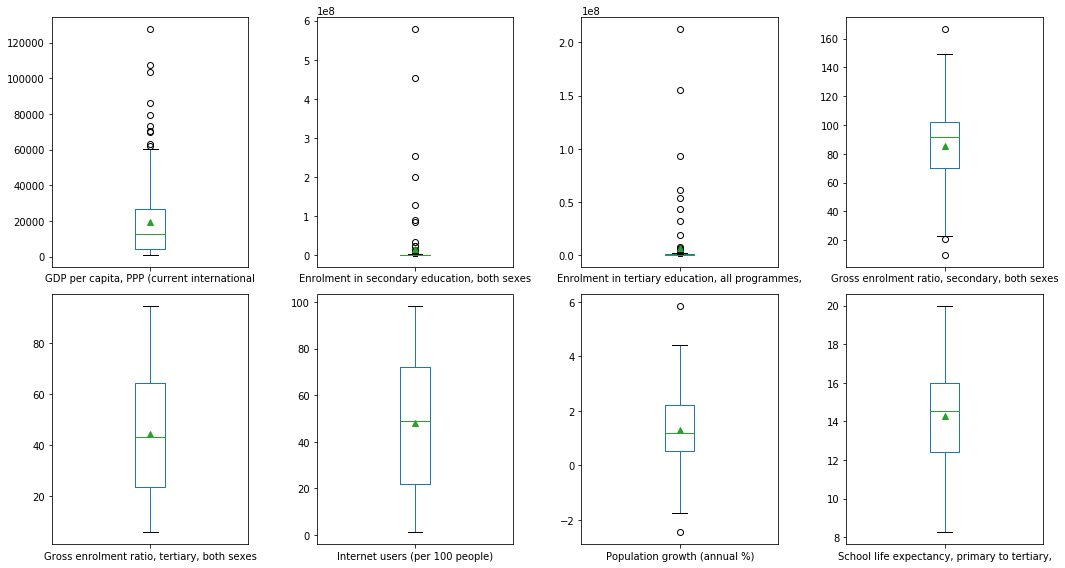

In [9]:
#From the available Indicators, selection of interesting one
interesting_id=['GDP per capita, PPP (current international $)',
                'Enrolment in secondary education, both sexes (number)',
                'Enrolment in tertiary education, all programmes, both sexes (number)',
                'Gross enrolment ratio, secondary, both sexes (%)',
                'Gross enrolment ratio, tertiary, both sexes (%)',
                'Internet users (per 100 people)',
                'Population growth (annual %)',
                'School life expectancy, primary to tertiary, both sexes (years)']

for i,id in enumerate(interesting_id):    
    print(f'{data[data["Indicator Name"]==id].iloc[4:].count().mean()*100/COUNTRY_LEN:.1f}% data available for {id}')

NUMBER_ID_STUDIED = len(interesting_id)

#Boxplot
fig, ax = plt.subplots(ncols=4, nrows=2,  figsize=(15,8))
for i,feat in enumerate(interesting_id):
    
    split = feat.split(" ")
    s = " "
    lab = split[:6]
    lab = s.join(lab)
    
    df = data[data['Indicator Name']==feat]
    if i<4:
        axj=i
        axi=0
    else:
        axi=1
        axj = i-4
        
    df["2015"].dropna().plot(kind='box',showmeans=True, ax=ax[axi,axj],label = lab)
plt.tight_layout()

The presence of outliers (according to Tukey's methodology) for some indicators is normal, due to the fact that what is considered to be a country can also be a geographical area (Asia or even World). We will keep these outliers for the rest of the study. 

# Most promising countries

In [10]:
NB_COUNTRIES_STUDIED = 15
QUARTILE_THRESH = 0.7

def id_study(df,id_name,type_of_id):
    """Select the countries with the highest values from an indicator"""
    if type_of_id == 0:
        a = df[df['Indicator Code'] == id_name]
    else:
        a = df[df['Indicator Name'] == id_name]
    
    #Get the year with the most data from the last 5 years 
    b = a.iloc[:,4:].isna().sum()
    year_study = b.idxmin()
    column_study = int(year_study)-2016
    
    #Get only the QUARTILE_THRESH highest values
    thresh = a[year_study].quantile(QUARTILE_THRESH)
    a = a[a[year_study]>=thresh].iloc[:,0]
    a.tolist()
    return a

id_analysis = []

#results of countries with highest indicators values
for i in range(0,NUMBER_ID_STUDIED):
    id_analysis = [*id_analysis,*id_study(data,interesting_id[i],1)]

#Give each country a score resulting from the indicators analysis, 
#+1 if present on the top 25% values in each indicator
def top_country(id_analys):
    """Rank the 15 most promising countries"""
    count_country = []
    count_country = [[i,id_analys.count(i)] for i in COUNTRY_LIST]
    count_country_sorted = sorted(count_country,reverse=True, key=lambda country: country[1]) 
    
    return count_country_sorted[:NB_COUNTRIES_STUDIED]

In [11]:
interesting_country = top_country(id_analysis)
print("Most promising geographical areas: {}".format(interesting_country))

Most promising geographical areas: [['Euro area', 7], ['Europe & Central Asia', 7], ['European Union', 7], ['High income', 7], ['OECD members', 7], ['Italy', 7], ['Japan', 7], ['Spain', 7], ['North America', 6], ['France', 6], ['Korea, Rep.', 6], ['Poland', 6], ['United Kingdom', 6], ['United States', 6], ['Argentina', 5]]


In [12]:
#Remove areas that are not a country
selected_country = [i[0] for i in interesting_country]
selected_country = selected_country[5:]
selected_country.remove('North America')

print("Most promising countries for the company: {}".format(selected_country))

Most promising countries for the company: ['Italy', 'Japan', 'Spain', 'France', 'Korea, Rep.', 'Poland', 'United Kingdom', 'United States', 'Argentina']


## Study of each country by indicator

In [13]:
def id_evolution(df,id_name,country):
    """Select values from specific indicator for all selected contries"""
    return df[(df['Country Name'].isin(country)) & (df['Indicator Name']==id_name)]

#Choose the year 2013, with the maximum data
YEAR_COMPUTED = str(2013)

selected_country.sort()
country =  {"Country Name":selected_country}
result = pd.DataFrame(data=country)

#Importance of each indicator
indicator_weight = [3,3,3,1,1,3,2,1]

for i,v in enumerate(interesting_id):
    result[v] = (NUMBER_ID_STUDIED - id_evolution(data,v,selected_country)[YEAR_COMPUTED].rank(method='min') + 2).values
    result[v] = result[v]*indicator_weight[i]

result['Ranks_mean'] = result.mean(axis=1)
# result['Ranks_median'] = result.median(axis=1)
result['TOTAL'] = result.sum(axis=1)
result['Rank'] = result['Ranks_mean'].rank(method='min')
result

,Country Name,"GDP per capita, PPP (current international $)","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","Gross enrolment ratio, secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"School life expectancy, primary to tertiary, both sexes (years)",Ranks_mean,TOTAL,Rank
0,Argentina,27.0,18.0,12.0,5.0,4.0,24.0,4.0,3.0,12.125,109.125,6.0
1,France,6.0,12.0,18.0,3.0,8.0,12.0,10.0,8.0,9.625,86.625,4.0
2,Italy,15.0,15.0,27.0,6.0,6.0,27.0,2.0,7.0,13.125,118.125,7.0
3,Japan,12.0,6.0,6.0,7.0,7.0,6.0,16.0,9.0,8.625,77.625,3.0
4,"Korea, Rep.",18.0,21.0,9.0,8.0,1.0,9.0,12.0,4.0,10.250,92.250,5.0
5,Poland,24.0,27.0,24.0,4.0,5.0,21.0,14.0,6.0,15.625,140.625,9.0
6,Spain,21.0,24.0,21.0,1.0,3.0,15.0,18.0,2.0,13.125,118.125,7.0
7,United Kingdom,9.0,9.0,15.0,2.0,9.0,3.0,8.0,1.0,7.000,63.000,2.0
8,United States,3.0,3.0,3.0,9.0,2.0,18.0,6.0,5.0,6.125,55.125,1.0


In [14]:
result[['Country Name','Ranks_mean','TOTAL','Rank']]

,Country Name,Ranks_mean,TOTAL,Rank
0,Argentina,12.125,109.125,6.0
1,France,9.625,86.625,4.0
2,Italy,13.125,118.125,7.0
3,Japan,8.625,77.625,3.0
4,"Korea, Rep.",10.250,92.250,5.0
5,Poland,15.625,140.625,9.0
6,Spain,13.125,118.125,7.0
7,United Kingdom,7.000,63.000,2.0
8,United States,6.125,55.125,1.0


## Results

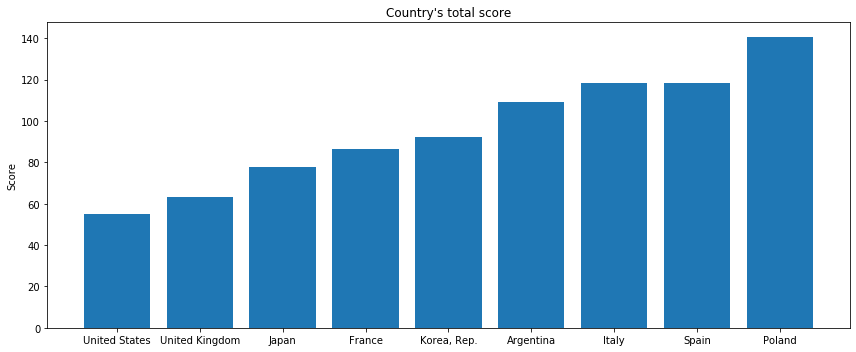

In [15]:
rank = result['Rank'].sort_values()
rank = rank.index.tolist()
result = result.reindex(rank)
# result.iloc[:,[0,-4,-3,-2,-1]]

plt.figure(figsize=(12,5))
plt.bar(result["Country Name"],result["TOTAL"])
plt.ylabel("Score")
plt.title("Country's total score")
plt.tight_layout()

In [16]:
def graph_by_indicator(id_name,country):
    df = id_evolution(data,id_name,country).iloc[:,[0,4,5,6,7,8,9]] 
#     row = [df.iloc[i] for i in range(0,len(country))]
    
    for i,v in enumerate(df["Country Name"]):
        plt.plot(df.iloc[i][1:], label=v)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title(id_name)
#     plt.ylabel(id_name)
    plt.xlabel("Year's results")
    plt.tight_layout()
    
def all_graph(country):
    for i,v in enumerate(interesting_id):
    #     plt.subplot(ligne colonne numero)
        plt.subplot(4,2,i+1)
        graph_by_indicator(v,country)
        plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    
    plt.tight_layout()

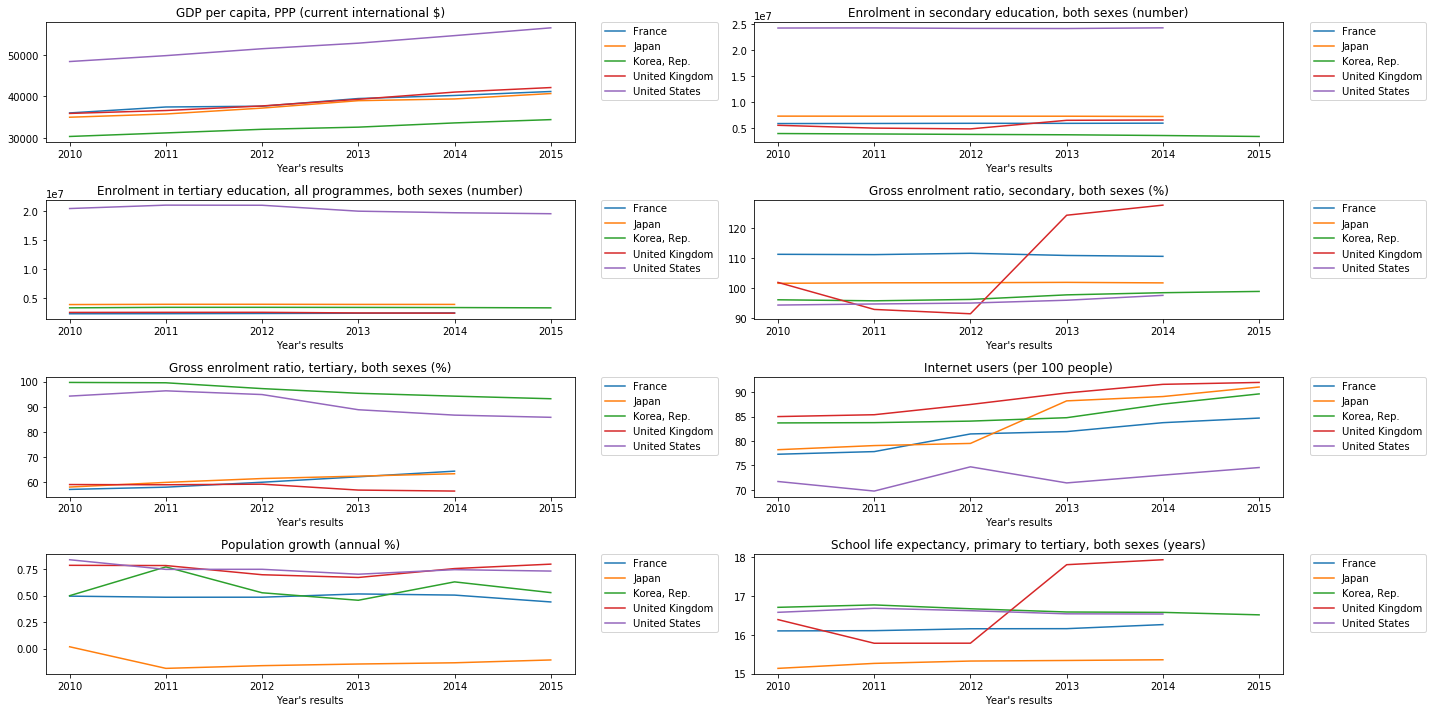

In [17]:
#Evolution of potential market
countries = [i for i in result["Country Name"][:5]]
plt.figure(figsize=(20,10))
all_graph(countries)

In [18]:
#Total adressable market: Number of students * % of internet user
df1 = id_evolution(data,interesting_id[1],countries)
df2 = id_evolution(data,interesting_id[2],countries)
df3 = id_evolution(data,interesting_id[5],countries)

TAM = []
for i,c in enumerate(df1["Country Name"]):
    a = (df1.iloc[i,8] + df2.iloc[i,8])*df3.iloc[i,8]/100
    a = int(a)/1000000
    TAM.append([a,c])
TAM.sort()
for i in TAM:
    print(f"{round(i[0],3)} M de clients potentiels pour {i[1]}")

6.039 M de clients potentiels pour Korea, Rep.
6.981 M de clients potentiels pour France
8.162 M de clients potentiels pour United Kingdom
9.882 M de clients potentiels pour Japan
32.069 M de clients potentiels pour United States


The USA are by far the most promising country, with a potentiel market at least three times superior to the other countries. Then, due to language barriers, even if the Japanese market seems to be more important, it would be interesting to go for the United Kingdom secondly along with other European countries.

# Future Improvements

- Calculate a score by indicator for each country, rather than using its rank, with score = value_country/max_value(for this indicator)
- Add significant indicators and check if the data is available for the chosen countries. If you have only ten countries but the ten are the only important ones, this indicator is as good as the others with more countries' data available. 
- Predict the market evolution with linear regressions. 